### **Exploring and Preparing Data**


#### **Introduction**
In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this project, we will perform Exploratory Data Analysis and Feature Engineering.

#### **Objectives**
Perform Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

* Exploratory Data Analysis
* Preparing Data Feature Engineering

#### **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Data**

In [6]:
df = pd.read_csv("dataset_EDA.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### **Exploratory Data Analysis**

**1. Visualize the relationship between Flight Number and Launch Site**

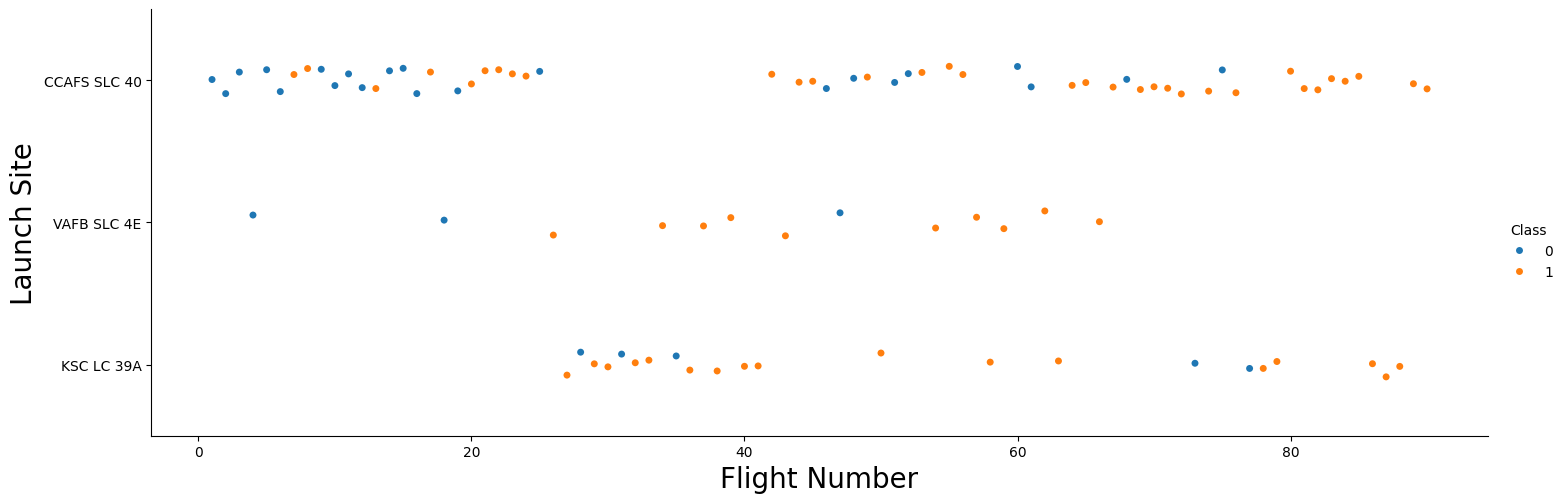

In [13]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

From the above chart, we can see that:

**Launch‐site sequencing & frequency**

* CCAFS SLC-40 is the workhorse: it has points at every FlightNumber from 1 through ~95.

* VAFB SLC-4E doesn’t appear until around flight ~20–25.

* KSC LC-39A only comes online around flight ~40–45.

**Success vs. failure over time**

* The blue dots (Class 0 = failures) are almost entirely confined to the earlier flights—mostly below flight 20–30.

* Past roughly flight 40–50, nearly every launch at all three sites is an orange dot (Class 1 = success).

That tells us: landing success climbed dramatically as SpaceX gained experience.

**Site‐level reliability**

* Even at CCAFS, you see a handful of early failures, but after ~flight 20 it’s predominantly successful.

* VAFB and KSC both follow the same improvement curve, with very few or no failures once they’ve been flown a few times.

**Bottom line:**

* SpaceX’s booster landing success rate improved steadily with each new flight,

* and all three pads ended up with very high success rates by around flight 50+.


**2. Visualize the relationship between Payload Mass and Launch Site**

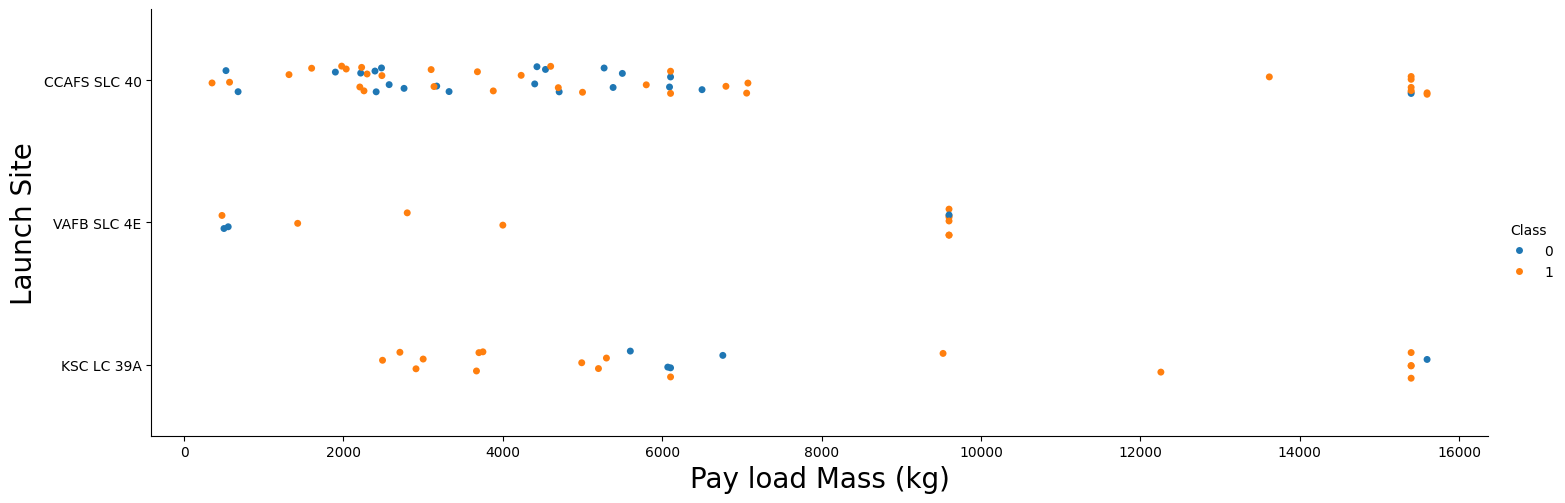

In [15]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue = "Class", data=df, aspect = 3)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

**Distribution of payloads by site**

* CCAFS SLC-40 handles the widest range—from small to very heavy payloads.

* VAFB SLC-4E specializes in mid-range masses (~2 000–6 000 kg).

* KSC LC-39A mostly carries lighter payloads (<2 000 kg).

**Success vs. failure patterns**

* Failures (blue) occur almost exclusively at lower masses and in the early missions.

* Successes (orange) span the full payload range once sites are up-and-running, indicating that by the time each pad reaches full cadence, they’re reliably lifting payloads of any weight.

Now we find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

**3. Visualize the relationship between success rate of each orbit type**

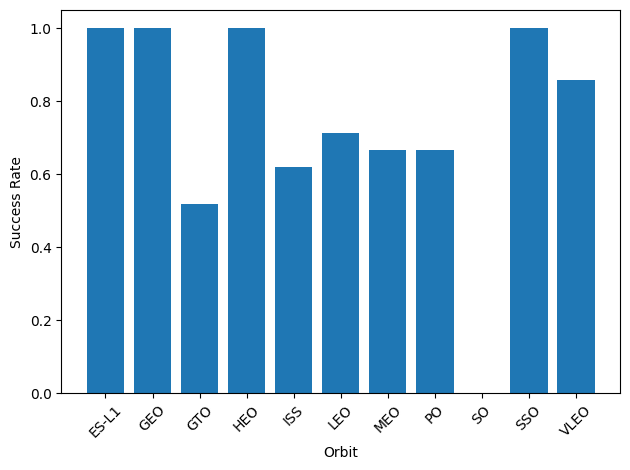

In [21]:
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure()
plt.bar(success_rates['Orbit'], success_rates['Class'])
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart tells us that :

* Orbits with 100 % success: ES-L1, GEO, HEO, SSO

* High but not perfect: VLEO (~85 %) and LEO (~70 %)

* Moderate success: ISS (~62 %), MEO/PO (~67 %)

* Lowest success: GTO (~52 %) and SO (0 %)

Buttom Line: More complex or higher-energy orbits (e.g. GTO, interplanetary SO) show lower landing success—reflecting the extra challenge of those mission profiles.

**4. Visualize the relationship between FlightNumber and Orbit type**


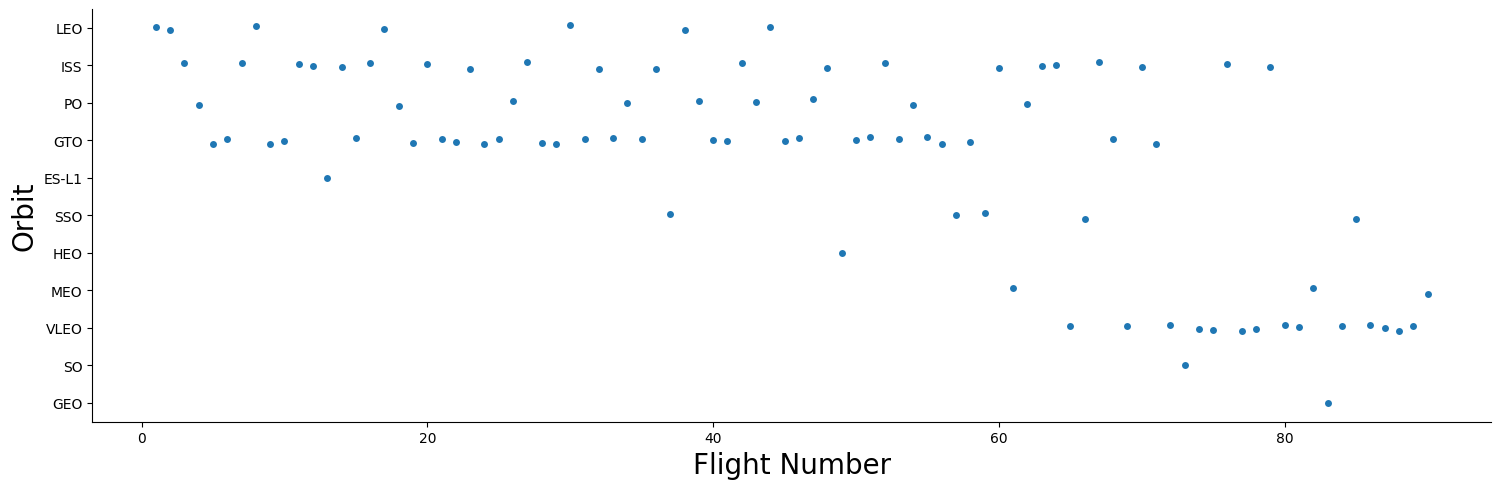

In [26]:
sns.catplot(x='FlightNumber', y='Orbit', data=df, aspect=3)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.tight_layout()
plt.show()

We can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

**5. Visualize the relationship between Payload Mass and Orbit type**

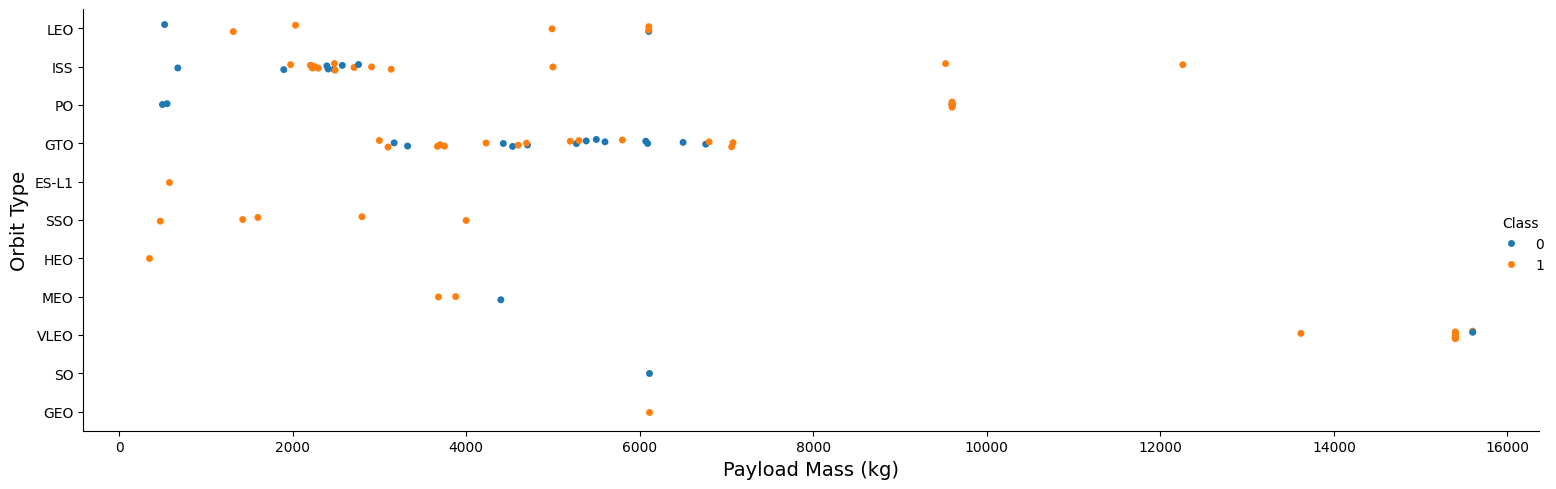

In [27]:
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, aspect=3)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

**6. Visualize the launch success yearly trend**

In [ ]:
# Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


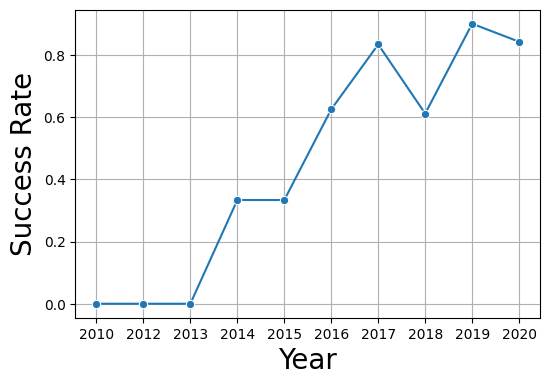

In [30]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_by_year = df.groupby('Date')['Class'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(data= success_by_year, x='Date', y='Class', marker='o')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.grid(True)
plt.show()
        

We can observe that the success rate since **2013** kept increasing till 2020

#### **Features Engineering**

By now, we should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [31]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Create dummy variables to categorical columns

In [34]:
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'Site', 'Pad', 'Serial']
)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Cast all numeric columns to float64

In [35]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a CSV for the next part of the project

In [36]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)